In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import scipy.stats as stat

In [2]:
def Dataset(filename):
    
    data = np.genfromtxt(filename,dtype=None,missing_values=9999,filling_values=0,names=True)
    
    return data
    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until


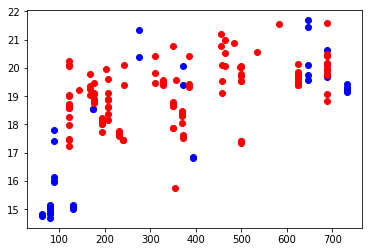

In [4]:
sne = Dataset('conreview.txt')
m2index = np.where((sne['filter'] == b'uvm2')&(sne['correrr'] != 0))
w1index = np.where((sne['filter'] == b'uvw1')&(sne['correrr'] != 0))
m2sne = sne[m2index]
w1sne = sne[w1index]
nuvbindex = np.where((m2sne['type'] == b'nuvb')&(m2sne['mag'] != 0)&(m2sne['correrr'] != 0))
nuvrindex = np.where((m2sne['type'] == b'nuvr')&(m2sne['mag'] != 0)&(m2sne['correrr'] != 0))
nuvbsne = m2sne[nuvbindex]
nuvrsne = m2sne[nuvrindex]
#nuvbsne['mag'] = -2.5*np.log10(weighter(nuvbsne['name'],nuvbsne)) + 16.85
#nuvrsne['mag'] = -2.5*np.log10(weighter(nuvrsne['name'],nuvrsne)) + 16.85
#plt.plot(6480./np.pi/nuvbsne['aper'],nuvbsne['mag'],'bo')
#plt.plot(6480./np.pi/nuvrsne['aper'],nuvrsne['mag'],'ro')

In [3]:
def weighter(names,data):
    
    values = []
    
    for i in range(len(names)):
        
        index = np.where(data['name'] == names[i])
        blah = data[index]
        weighted = np.sum(blah['corrcount']/blah['correrr'])
        unweighted = weighted / np.sum(1./blah['correrr'])
        values.append(unweighted)
        
    
    return np.asarray(values)
    

0.006582826991884936 16.499149629001824 0.6387612487200233 0.0009911488971656925
0.005959134824163822 15.890239299013732 0.6812987627760335 0.0007881120444487108


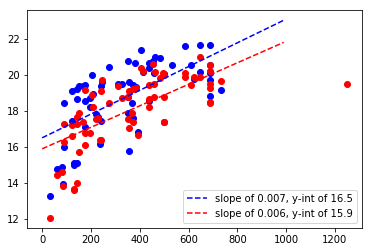

In [86]:
m2sne['mag'] = -2.5*np.log10(weighter(m2sne['name'],m2sne)) + 16.85
w1sne['mag'] = -2.5*np.log10(weighter(w1sne['name'],w1sne)) + 17.44

broadindex = np.where((m2sne['type'] == b'broad')&(m2sne['mag'] != 0))
faintindex = np.where((m2sne['type'] == b'faint')&(m2sne['mag'] != 0))
NNindex = np.where((m2sne['type'] == b'NN')&(m2sne['mag'] != 0))
broadsne = m2sne[broadindex]
faintsne = m2sne[faintindex]
NNsne = m2sne[NNindex]


wnuvbindex = np.where((w1sne['type'] == b'nuvb')&(w1sne['mag'] != 0))
wnuvrindex = np.where((w1sne['type'] == b'nuvr')&(w1sne['mag'] != 0))
wbroadindex = np.where((w1sne['type'] == b'broad')&(w1sne['mag'] != 0))
wfaintindex = np.where((w1sne['type'] == b'faint')&(w1sne['mag'] != 0))
wNNindex = np.where((w1sne['type'] == b'NN')&(w1sne['mag'] != 0))
wnuvbsne = w1sne[wnuvbindex]
wnuvrsne = w1sne[wnuvrindex]
wbroadsne = w1sne[wbroadindex]
wfaintsne = w1sne[wfaintindex]
wNNsne = w1sne[wNNindex]


uniquem2 = np.unique(m2sne['name'],return_index=True)
uniquew1 = np.unique(w1sne['name'],return_index=True)

uniquebroad = np.unique(broadsne['name'],return_index=True)
uniquefaint = np.unique(faintsne['name'],return_index=True)
uniqueNN = np.unique(NNsne['name'],return_index=True)
uniquenuvb = np.unique(nuvbsne['name'],return_index=True)
uniquenuvr = np.unique(nuvrsne['name'],return_index=True)

wuniquebroad = np.unique(wbroadsne['name'],return_index=True)
wuniquefaint = np.unique(wfaintsne['name'],return_index=True)
wuniqueNN = np.unique(wNNsne['name'],return_index=True)
wuniquenuvb = np.unique(wnuvbsne['name'],return_index=True)
wuniquenuvr = np.unique(wnuvrsne['name'],return_index=True)



m2sne = m2sne[uniquem2[1]]
w1sne = w1sne[uniquew1[1]]

nuvbsne = nuvbsne[uniquenuvb[1]]
nuvrsne = nuvrsne[uniquenuvr[1]]
broadsne = broadsne[uniquebroad[1]]
faintsne = faintsne[uniquefaint[1]]
NNsne = NNsne[uniqueNN[1]]

wnuvbsne = wnuvbsne[wuniquenuvb[1]]
wnuvrsne = wnuvrsne[wuniquenuvr[1]]
wbroadsne = wbroadsne[wuniquebroad[1]]
wfaintsne = wfaintsne[wuniquefaint[1]]
wNNsne = wNNsne[wuniqueNN[1]]



plt.plot(6480./np.pi/m2sne['aper'],m2sne['mag'],'bo')
plt.plot(6480./np.pi/w1sne['aper'],w1sne['mag'],'ro')

m,yint,r,p,sig = stat.linregress(6480./np.pi/m2sne['aper'],m2sne['mag'])
x = np.arange(0,1000,10)
y = m*x + yint
plt.plot(x,y,'b--',label='slope of 0.007, y-int of 16.5')
m2,yint2,r2,p2,sig2 = stat.linregress(6480./np.pi/w1sne['aper'],w1sne['mag'])
x2 = np.arange(0,1000,10)
y2 = m2*x + yint2
plt.plot(x2,y2,'r--',label='slope of 0.006, y-int of 15.9')
print(m,yint,r,sig)
print(m2,yint2,r2,sig2)
plt.legend(loc='lower right')

In [6]:
faintsne['aper']

array([15.7501 ,  4.97016, 13.6807 , 22.7859 ,  4.72743,  9.33963])

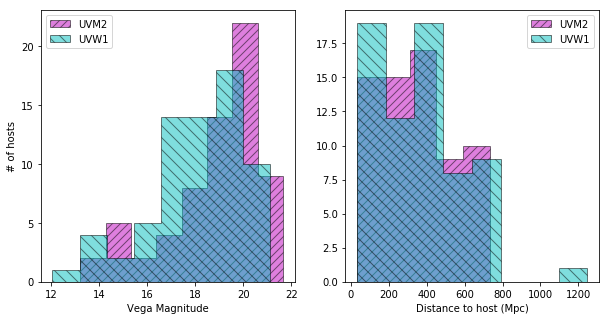

In [7]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
N, bins, patches = ax1.hist(m2sne['mag'],bins='fd',histtype='stepfilled',label='UVM2',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax1.hist(w1sne['mag'],bins='fd',histtype='stepfilled',label='UVW1',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')

N, bins, patches = ax2.hist(6480./np.pi/m2sne['aper'],bins='fd',histtype='stepfilled',label='UVM2',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax2.hist(6480./np.pi/w1sne['aper'],bins='fd',histtype='stepfilled',label='UVW1',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')

ax1.set_xlabel('Vega Magnitude')
ax2.set_xlabel('Distance to host (Mpc)')
ax1.set_ylabel('# of hosts')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

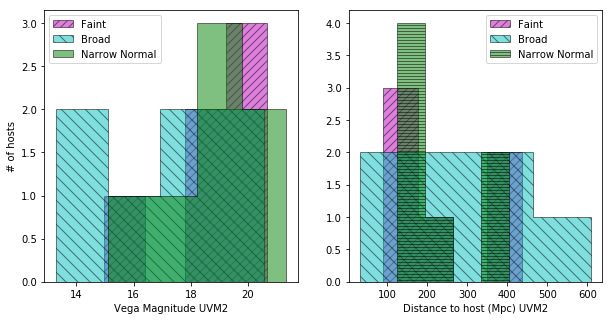

In [93]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

N, bins, patches = ax1.hist(faintsne['mag'],bins='auto',histtype='stepfilled',label='Faint',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax1.hist(broadsne['mag'],bins='auto',histtype='stepfilled',label='Broad',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
N, bins, patches = ax1.hist(NNsne['mag'],bins='auto',histtype='stepfilled',label='Narrow Normal',alpha=0.5,color='g',edgecolor='k')

N, bins, patches = ax2.hist(6480./np.pi/faintsne['aper'],bins='auto',histtype='stepfilled',label='Faint',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax2.hist(6480./np.pi/broadsne['aper'],bins='auto',histtype='stepfilled',label='Broad',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
N, bins, patches = ax2.hist(6480./np.pi/NNsne['aper'],bins='auto',histtype='stepfilled',label='Narrow Normal',alpha=0.5,color='g',edgecolor='k',hatch='----')

ax1.set_xlabel('Vega Magnitude UVM2')
ax2.set_xlabel('Distance to host (Mpc) UVM2')
ax1.set_ylabel('# of hosts')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

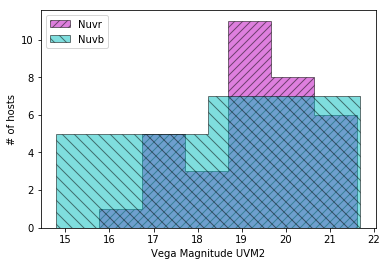

In [92]:
fig1, ax = plt.subplots(1)
N, bins, patches = ax.hist(nuvrsne['mag'],bins='fd',histtype='stepfilled',label='Nuvr',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax.hist(nuvbsne['mag'],bins='fd',histtype='stepfilled',label='Nuvb',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
plt.xlabel('Vega Magnitude UVM2')
plt.ylabel('# of hosts')
ax.legend(loc='upper left')

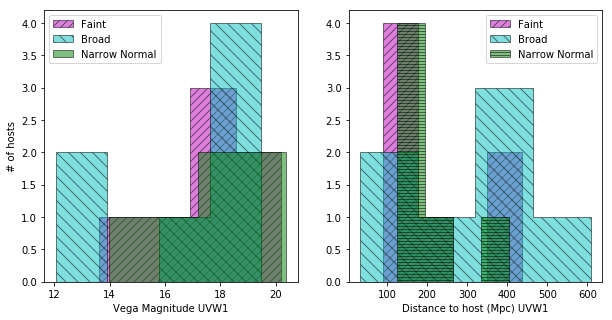

In [91]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

N, bins, patches = ax1.hist(wfaintsne['mag'],bins='auto',histtype='stepfilled',label='Faint',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax1.hist(wbroadsne['mag'],bins='auto',histtype='stepfilled',label='Broad',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
N, bins, patches = ax1.hist(wNNsne['mag'],bins='auto',histtype='stepfilled',label='Narrow Normal',alpha=0.5,color='g',edgecolor='k')

N, bins, patches = ax2.hist(6480./np.pi/wfaintsne['aper'],bins='auto',histtype='stepfilled',label='Faint',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax2.hist(6480./np.pi/wbroadsne['aper'],bins='auto',histtype='stepfilled',label='Broad',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
N, bins, patches = ax2.hist(6480./np.pi/wNNsne['aper'],bins='auto',histtype='stepfilled',label='Narrow Normal',alpha=0.5,color='g',edgecolor='k',hatch='----')

ax1.set_xlabel('Vega Magnitude UVW1')
ax2.set_xlabel('Distance to host (Mpc) UVW1')
ax1.set_ylabel('# of hosts')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

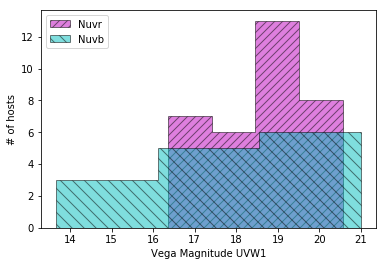

In [89]:
fig1, ax = plt.subplots(1)
N, bins, patches = ax.hist(wnuvrsne['mag'],bins='fd',histtype='stepfilled',label='Nuvr',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax.hist(wnuvbsne['mag'],bins='fd',histtype='stepfilled',label='Nuvb',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
plt.xlabel('Vega Magnitude UVW1')
plt.ylabel('# of hosts')
ax.legend(loc='upper left')


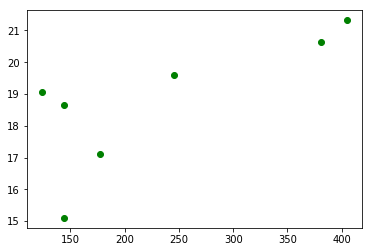

In [10]:
#plt.plot(6480./np.pi/broadsne['aper'],broadsne['mag'],'bo')
#plt.plot(6480./np.pi/faintsne['aper'],faintsne['mag'],'ro')
plt.plot(6480./np.pi/NNsne['aper'],NNsne['mag'],'go')

In [68]:
kelly = Dataset('Kellyreview.txt')
H09 = Dataset('H09review.txt')
kellym2index = np.where((kelly['filter'] == b'uvm2')&(kelly['rawcount'] > kelly ['rawerr']))
kellyw1index = np.where((kelly['filter'] == b'uvw1')&(kelly['rawcount'] > kelly ['rawerr']))
kellym2 = kelly[kellym2index]
kellyw1 = kelly[kellyw1index]

kellydata = Dataset('keldat.txt')
kellydata = kellydata[np.where(kellydata['err'] <=2)]

kellym2['mag'] = -2.5*np.log10(weighter(kellym2['name'],kellym2)) + 16.85
kellyw1['mag'] = -2.5*np.log10(weighter(kellyw1['name'],kellyw1)) + 17.44
kellym2['magerr'] = -2.5*np.log10(weighter(kellym2['name'],kellym2) - kellym2['rawerr']) + 16.85 - kellym2['mag']
kellyw1['magerr'] = -2.5*np.log10(weighter(kellyw1['name'],kellyw1) - kellyw1['rawerr']) + 17.44 - kellyw1['mag']

unique1 = np.unique(kellyw1['name'],return_index=True)
kellyw1 = kellyw1[unique1[1]]
kellyw1 = kellyw1[np.where(kellyw1['magerr'] < 2.)]
unique2 = np.unique(kellym2['name'],return_index=True)
kellym2 = kellym2[unique2[1]]
kellym2 = kellym2[np.where(kellym2['magerr'] < 2.)]



H09m2index = np.where((H09['filter'] == b'uvm2')&(H09['rawcount'] > H09['rawerr']))
H09w1index = np.where((H09['filter'] == b'uvw1')&(H09['rawcount'] > H09['rawerr']))
H09m2 = H09[H09m2index]
H09w1 = H09[H09w1index]

H09data = Dataset('H09dat.txt')
H09data = H09data[np.where(H09data['err'] <= 2.)]

H09m2['mag'] = -2.5*np.log10(weighter(H09m2['name'],H09m2)) + 16.85
H09w1['mag'] = -2.5*np.log10(weighter(H09w1['name'],H09w1)) + 17.44
H09m2['magerr'] = -2.5*np.log10(weighter(H09m2['name'],H09m2) - H09m2['rawerr']) + 16.85 - H09m2['mag']
H09w1['magerr'] = -2.5*np.log10(weighter(H09w1['name'],H09w1) - H09w1['rawerr']) + 17.44 - H09w1['mag']

unique1 = np.unique(H09w1['name'],return_index=True)
H09w1 = H09w1[unique1[1]]
H09w1 = H09w1[np.where(H09w1['magerr'] <= 2.)]
unique2 = np.unique(H09m2['name'],return_index=True)
H09m2 = H09m2[unique2[1]]
H09m2 = H09m2[np.where(H09m2['magerr'] <= 2.)]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log10
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log10
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less_equal


In [69]:
weighter([b'05hj'],H09)

array([0.01247184])

In [70]:
kellynuvdata = Dataset('kellynuv.txt')
kellynuvdata = kellynuvdata[np.where(kellynuvdata['err'] < 2.)]
nuvoofw = np.intersect1d(kellyw1['name'],kellynuvdata['name'],return_indices=True)
nuvoofm = np.intersect1d(kellym2['name'],kellynuvdata['name'],return_indices=True)
kelnuvmagw = kellynuvdata[nuvoofw[2]]
kelnuvmagm = kellynuvdata[nuvoofm[2]]
kellynuvw1mag = kellyw1[nuvoofw[1]]
kellynuvm2mag = kellym2[nuvoofm[1]]



H09nuvdata = Dataset('H09nuv.txt')
H09nuvdata = H09nuvdata[np.where(H09nuvdata['err'] < 2.)]
nuvboofw = np.intersect1d(H09w1['name'],H09nuvdata['name'],return_indices=True)
nuvboofm = np.intersect1d(H09m2['name'],H09nuvdata['name'],return_indices=True)
H09nuvmagw = H09nuvdata[nuvboofw[2]]
H09nuvmagm = H09nuvdata[nuvboofm[2]]
H09nuvw1mag = H09w1[nuvboofw[1]]
H09nuvm2mag = H09m2[nuvboofm[1]]




C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until


0.8202772553551548 -3.9358374550728357 0.8658381088455587 0.0012017248271583572 0.1675832252819857
1.0865227243840245 -9.848503721040185 0.9733050836499391 2.151353056652958e-06 0.09058498739044114


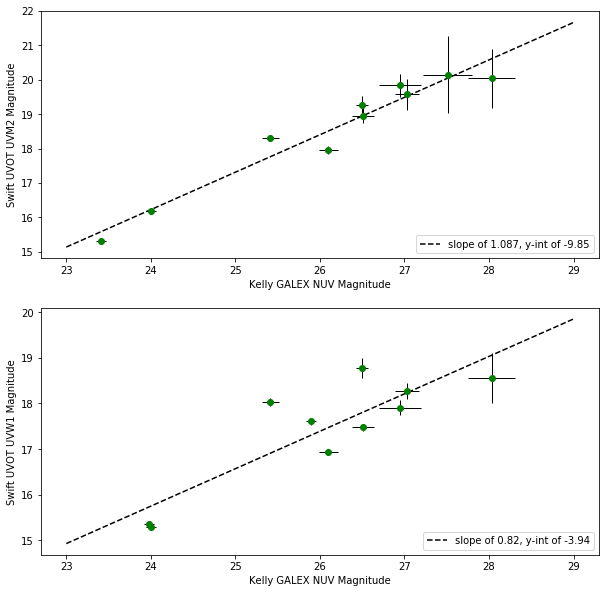

In [71]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.errorbar(kelnuvmagm['mag'],kellynuvm2mag['mag'],xerr=kelnuvmagm['err'],yerr=kellynuvm2mag['magerr'],fmt='go',ecolor='black',elinewidth=1)
ax2.errorbar(kelnuvmagw['mag'],kellynuvw1mag['mag'],xerr=kelnuvmagw['err'],yerr=kellynuvw1mag['magerr'],fmt='go',ecolor='black',elinewidth=1)
m,yint,r,p,sig = stat.linregress(kelnuvmagw['mag'],kellynuvw1mag['mag'])
x = np.arange(23,30,1)
y = m*x + yint
ax2.plot(x,y,'k--',label='slope of 0.82, y-int of -3.94')
m2,yint2,r2,p2,sig2 = stat.linregress(kelnuvmagm['mag'],kellynuvm2mag['mag'])
x2 = np.arange(23,30,1)
y2 = m2*x2 + yint2
ax1.plot(x2,y2,'k--',label='slope of 1.087, y-int of -9.85')
ax1.set_xlabel('Kelly GALEX NUV Magnitude')
ax2.set_xlabel('Kelly GALEX NUV Magnitude')
ax1.set_ylabel('Swift UVOT UVM2 Magnitude')
ax2.set_ylabel('Swift UVOT UVW1 Magnitude')
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
print(m,yint,r,p,sig)
print(m2,yint2,r2,p2,sig2)



0.6456146179193833 5.448324263602284 0.8826428065647504 2.509455666685038e-08 0.07502699350311086
0.6808852215772812 5.251263528682095 0.8611404182167262 9.030601697567354e-06 0.10378433376045189


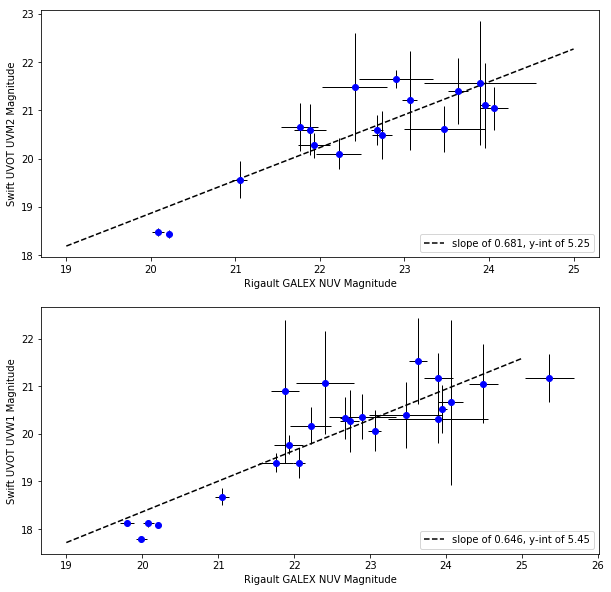

In [83]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.errorbar(H09nuvmagm['mag'],H09nuvm2mag['mag'],xerr=H09nuvmagm['err'],yerr=H09nuvm2mag['magerr'],fmt='bo',ecolor='black',elinewidth=1)
ax2.errorbar(H09nuvmagw['mag'],H09nuvw1mag['mag'],xerr=H09nuvmagw['err'],yerr=H09nuvw1mag['magerr'],fmt='bo',ecolor='black',elinewidth=1)
#ax.xaxis.set_major_locator(plt.MaxNLocator(8))
m,yint,r,p,sig = stat.linregress(H09nuvmagw['mag'],H09nuvw1mag['mag'])
x = np.arange(19,26,1)
y = m*x + yint
m2,yint2,r2,p2,sig2 = stat.linregress(H09nuvmagm['mag'],H09nuvm2mag['mag'])
x2 = np.arange(19,26,1)
y2 = m2*x2 + yint2
ax2.plot(x,y,'k--',label='slope of 0.646, y-int of 5.45')
ax2.set_xlabel('Rigault GALEX NUV Magnitude')
ax2.set_ylabel('Swift UVOT UVW1 Magnitude')
ax2.legend(loc='lower right')
ax1.plot(x2,y2,'k--',label='slope of 0.681, y-int of 5.25')
ax1.set_xlabel('Rigault GALEX NUV Magnitude')
ax1.set_ylabel('Swift UVOT UVM2 Magnitude')
ax1.legend(loc='lower right')
print(m,yint,r,p,sig)
print(m2,yint2,r2,p2,sig2)



0.9019661882897347 -6.740393876094885 0.88586612842529 0.0006454744880228679 0.1670089987771392
1.0428069386199192 -9.555442157212884 0.938616277788186 5.765484020162865e-05 0.13550127275066265


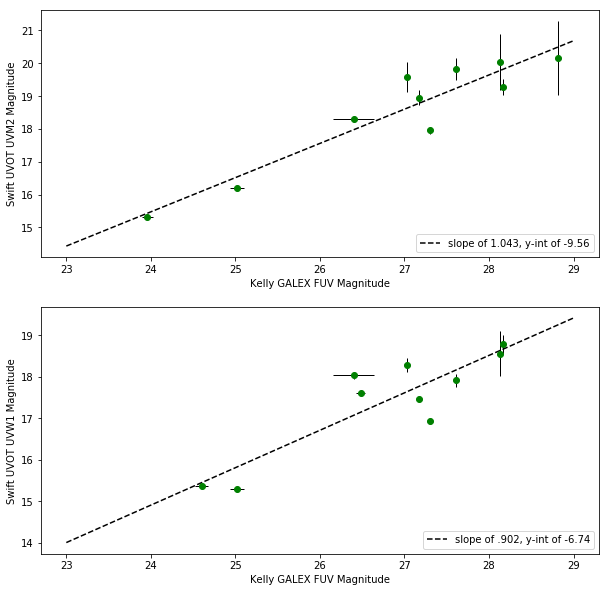

In [73]:
oofw = np.intersect1d(kellyw1['name'],kellydata['name'],return_indices=True)
boofw = np.intersect1d(H09w1['name'],H09data['name'],return_indices=True)
oofm = np.intersect1d(kellym2['name'],kellydata['name'],return_indices=True)
boofm = np.intersect1d(H09m2['name'],H09data['name'],return_indices=True)
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
keldatmagw = kellydata[oofw[2]]
keldatmagm = kellydata[oofm[2]]
kellyw1mag = kellyw1[oofw[1]]
kellym2mag = kellym2[oofm[1]]
ax1.errorbar(keldatmagm['mag'],kellym2mag['mag'],xerr=keldatmagm['err'],yerr=kellym2mag['magerr'],fmt='go',ecolor='black',elinewidth=1)
ax2.errorbar(keldatmagw['mag'],kellyw1mag['mag'],xerr=keldatmagw['err'],yerr=kellyw1mag['magerr'],fmt='go',ecolor='black',elinewidth=1)
m,yint,r,p,sig = stat.linregress(keldatmagw['mag'],kellyw1mag['mag'])
x = np.arange(23,30,1)
y = m*x + yint
ax2.plot(x,y,'k--',label='slope of .902, y-int of -6.74')
m2,yint2,r2,p2,sig2 = stat.linregress(keldatmagm['mag'],kellym2mag['mag'])
x2 = np.arange(23,30,1)
y2 = m2*x2 + yint2
ax1.plot(x2,y2,'k--',label='slope of 1.043, y-int of -9.56')
ax1.set_xlabel('Kelly GALEX FUV Magnitude')
ax2.set_xlabel('Kelly GALEX FUV Magnitude')
ax1.set_ylabel('Swift UVOT UVM2 Magnitude')
ax2.set_ylabel('Swift UVOT UVW1 Magnitude')
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
print(m,yint,r,p,sig)
print(m2,yint2,r2,p2,sig2)
#kellym2['name']
#kellydata2 = kellydata[np.where(kellydata['name'] == kellym2['name'])]
#plt.plot(kellydata2['mag'],kellym2[unique[1]],'go')
#kellym2[unique[1]]
#kellydata
#kellydata2

0.4432901024026747 9.81785467676688 0.6200669721989238 0.12867454562488548
0.47247323053715684 9.614871845278039 0.6689732126104277 0.1455972110110644


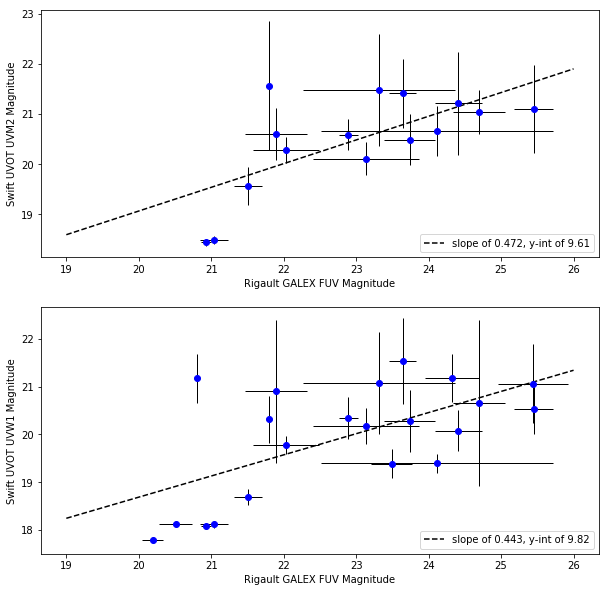

In [82]:
H09datmagw = H09data[boofw[2]]
H09w1mag = H09w1[boofw[1]]
H09datmagm = H09data[boofm[2]]
H09m2mag = H09m2[boofm[1]]
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.errorbar(H09datmagm['mag'],H09m2mag['mag'],xerr=H09datmagm['err'],yerr=H09m2mag['magerr'],fmt='bo',ecolor='black',elinewidth=1)
ax2.errorbar(H09datmagw['mag'],H09w1mag['mag'],xerr=H09datmagw['err'],yerr=H09w1mag['magerr'],fmt='bo',ecolor='black',elinewidth=1)
#ax.xaxis.set_major_locator(plt.MaxNLocator(8))
m,yint,r,p,sig = stat.linregress(H09datmagw['mag'],H09w1mag['mag'])
x = np.arange(19,27,1)
y = m*x + yint
m2,yint2,r2,p2,sig2 = stat.linregress(H09datmagm['mag'],H09m2mag['mag'])
x2 = np.arange(19,27,1)
y2 = m2*x2 + yint2
ax2.plot(x,y,'k--',label='slope of 0.443, y-int of 9.82')
ax2.set_xlabel('Rigault GALEX FUV Magnitude')
ax2.set_ylabel('Swift UVOT UVW1 Magnitude')
ax2.legend(loc='lower right')
ax1.plot(x2,y2,'k--',label='slope of 0.472, y-int of 9.61')
ax1.set_xlabel('Rigault GALEX FUV Magnitude')
ax1.set_ylabel('Swift UVOT UVM2 Magnitude')
ax1.legend(loc='lower right')
print(m,yint,r,sig)
print(m2,yint2,r2,sig2)

In [63]:
print(H09m2mag[np.where(H09m2mag['mag'] > 22.)])

[]


In [ ]:
fig1, ax = plt.subplots(1)
N, bins, patches = ax.hist(m2sne['mag'],bins='fd',histtype='stepfilled',label='m2 filter',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax.hist(w1sne['mag'],bins='fd',histtype='stepfilled',label='w1 filter',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
plt.title('Magnitudes by filter')
plt.xlabel('Vega Magnitude')
plt.ylabel('# of hosts')
ax.legend(loc='upper left')

In [ ]:
fig1, ax = plt.subplots(1)
N, bins, patches = ax.hist(,bins='fd',histtype='stepfilled',label='m2 filter',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax.hist(,bins='fd',histtype='stepfilled',label='w1 filter',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
plt.title('Magnitudes by filter')
plt.xlabel('Vega Magnitude')
plt.ylabel('# of hosts')
ax.legend(loc='upper left')

In [ ]:
np.savetxt('nuvb.txt',(np.transpose([nuvbsne['name'],nuvbsne['mag']])),fmt='%10s',header='name magnitude')
np.savetxt('nuvr.txt',(np.transpose([nuvrsne['name'],nuvrsne['mag']])),fmt='%10s',header='name magnitude')
np.savetxt('broad.txt',(np.transpose([broadsne['name'],broadsne['mag']])),fmt='%10s',header='name magnitude')
np.savetxt('faint.txt',(np.transpose([faintsne['name'],faintsne['mag']])),fmt='%10s',header='name magnitude')
np.savetxt('narnorm.txt',(np.transpose([NNsne['name'],NNsne['mag']])),fmt='%10s',header='name magnitude')